# **Libraries**

In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
!pip install autots
from autots import AutoTS


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.7/953.7 kB 15.4 MB/s eta 0:00:00


# **DataSet**

In [3]:
data = pd.read_csv('gold_futures(in).csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price Movement
0,1/2/2020,1518.099976,1528.699951,1518.000000,1524.500000,1524.500000,214,Up
1,1/3/2020,1530.099976,1552.699951,1530.099976,1549.199951,1549.199951,107,Up
2,1/6/2020,1580.000000,1580.000000,1560.400024,1566.199951,1566.199951,416,Up
3,1/7/2020,1558.300049,1576.300049,1558.300049,1571.800049,1571.800049,47,Up
4,1/8/2020,1579.699951,1604.199951,1552.300049,1557.400024,1557.400024,236,Down


# **Data Preprocessing For Prophet**

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

prophet_data = data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
print(prophet_data.head())

          ds            y
0 2020-01-02  1524.500000
1 2020-01-03  1549.199951
2 2020-01-06  1566.199951
3 2020-01-07  1571.800049
4 2020-01-08  1557.400024


# **Prophet Model**

**Train Prophet Model**

In [5]:
# Initialize and fit Prophet model
model = Prophet()
model.fit(prophet_data)

# Create future DataFrame and make predictions
future = model.make_future_dataframe(periods=60)
forecast_prophet = model.predict(future)
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp280qxh8l/m7yovj_y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp280qxh8l/d2p5_un4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3818', 'data', 'file=/tmp/tmp280qxh8l/m7yovj_y.json', 'init=/tmp/tmp280qxh8l/d2p5_un4.json', 'output', 'file=/tmp/tmp280qxh8l/prophet_modeldmqj7y67/prophet_model-20250125145843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:58:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds         yhat   yhat_lower   yhat_upper
1300 2025-02-10  2825.196181  2761.021991  2892.411113
1301 2025-02-11  2827.825115  2764.622082  2884.268419
1302 2025-02-12  2827.814498  2758.093438  2886.286086
1303 2025-02-13  2830.183882  2761.725993  2898.211723
1304 2025-02-14  2831.406327  2764.179393  2891.683038


**Visualize Prophet Results**

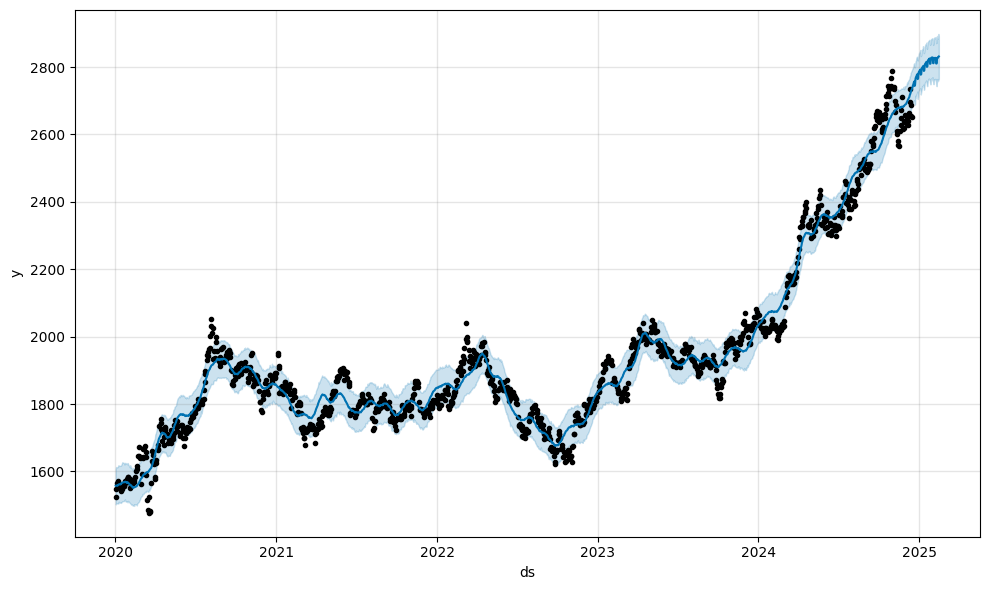

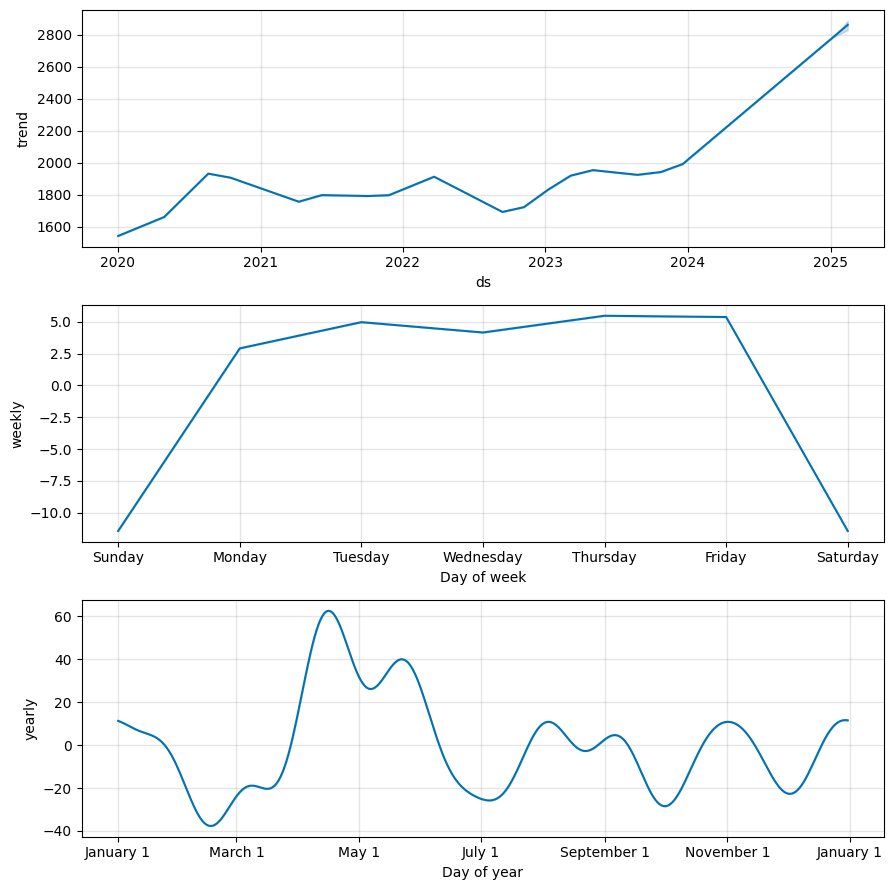

In [6]:
# Plot the forecast
model.plot(forecast_prophet)
plt.show()

# Plot the forecast components
model.plot_components(forecast_prophet)
plt.show()


**Evaluate Prophet Model**

In [7]:
# Extract actual and predicted values
y_true = prophet_data['y']
y_pred = forecast_prophet['yhat'].iloc[:len(y_true)]

# Calculate metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Save Prophet metrics
prophet_metrics = {"R²": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}
print(prophet_metrics)


{'R²': 0.9730804109849829, 'MAE': 33.53303264250895, 'MSE': 1825.7718010826713, 'RMSE': 42.72905102015105}


# **Data Preprocessing For AutoTS**

In [8]:
autots_data = data[['Date', 'Close']].rename(columns={'Date': 'date', 'Close': 'value'})
print(autots_data.head())


        date        value
0 2020-01-02  1524.500000
1 2020-01-03  1549.199951
2 2020-01-06  1566.199951
3 2020-01-07  1571.800049
4 2020-01-08  1557.400024


# **AutoTS Model**

**Train AutoTS Model**

In [9]:
# Initialize and fit AutoTS model
auto_model = AutoTS(forecast_length=60, frequency='D', model_list=['Prophet', 'Theta', 'ETS'])
auto_model = auto_model.fit(autots_data, date_col='date', value_col='value')

# Generate forecast
prediction_autots = auto_model.predict()
forecast_autots = prediction_autots.forecast
print(forecast_autots)


Using 1 cpus for n_jobs.
Data frequency is: B, used frequency is: D
Model Number: 1 with model ETS in generation 0 of 25
Model Number: 2 with model ETS in generation 0 of 25
Model Number: 3 with model FBProphet in generation 0 of 25
Model Number: 4 with model ETS in generation 0 of 25
Model Number: 5 with model FBProphet in generation 0 of 25
Model Number: 6 with model Theta in generation 0 of 25
Model Number: 7 with model FBProphet in generation 0 of 25
Model Number: 8 with model Theta in generation 0 of 25
Model Number: 9 with model FBProphet in generation 0 of 25
Model Number: 10 with model Theta in generation 0 of 25
Model Number: 11 with model ETS in generation 0 of 25
Model Number: 12 with model FBProphet in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 12 in generation 0: FBProphet
Model Number: 13 with model ETS in generation 0 of 25
Model Number: 14 with model FBProphet in generation 0 of 25
Model Number: 1

15:00:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 62 with model FBProphet in generation 3 of 25
Model Number: 63 with model Theta in generation 3 of 25
Model Number: 64 with model ETS in generation 3 of 25
Model Number: 65 with model Theta in generation 3 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:592: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 66 with model Theta in generation 3 of 25
Model Number: 67 with model ETS in generation 3 of 25
Model Number: 68 with model ETS in generation 3 of 25
New Generation: 4 of 25
Model Number: 69 with model FBProphet in generation 4 of 25
Model Number: 70 with model Theta in generation 4 of 25
Model Number: 71 with model Theta in generation 4 of 25
Model Number: 72 with model ETS in generation 4 of 25
Model Number: 73 with model ETS in generation 4 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 74 with model ETS in generation 4 of 25
Model Number: 75 with model Theta in generation 4 of 25
Model Number: 76 with model FBProphet in generation 4 of 25
Model Number: 77 with model Theta in generation 4 of 25
Model Number: 78 with model Theta in generation 4 of 25
Model Number: 79 with model Theta in generation 4 of 25
Model Number: 80 with model ETS in generation 4 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


Model Number: 81 with model Theta in generation 4 of 25
Model Number: 82 with model FBProphet in generation 4 of 25
Model Number: 83 with model Theta in generation 4 of 25
New Generation: 5 of 25
Model Number: 84 with model ETS in generation 5 of 25
Model Number: 85 with model Theta in generation 5 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params quadratic {'0': {}, '1': {}, '2': {'det_order': -1, 'k_ar_diff': 1}} with error ValueError('Coint only works on multivarate series')") in model 85 in generation 5: Theta
Model Number: 86 with model Theta in generation 5 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params quadratic {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {}, '2': {'rows': 1, 'lag': 7, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 101 with model ETS in generation 6 of 25
Model Number: 102 with model ETS in generation 6 of 25
Model Number: 103 with model Theta in generation 6 of 25
Model Number: 104 with model Theta in generation 6 of 25
Model Number: 105 with model Theta in generation 6 of 25
Model Number: 106 with model Theta in generation 6 of 25
Model Number: 107 with model ETS in generation 6 of 25
New Generation: 7 of 25
Model Number: 108 with model FBProphet in generation 7 of 25
Model Number: 109 with model Theta in generation 7 of 25
Model Number: 110 with model ETS in generation 7 of 25
Model Number: 111 with model FBProphet in generation 7 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.09286e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 112 with model Theta in generation 7 of 25
Model Number: 113 with model FBProphet in generation 7 of 25
Model Number: 114 with model ETS in generation 7 of 25
Model Number: 115 with model Theta in generation 7 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params nearest {'0': {}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '2': {}} with error ValueError('BTCD only works on multivarate series')") in model 115 in generation 7: Theta
Model Number: 116 with model ETS in generation 7 of 25
Model Number: 117 with model Theta in generation 7 of 25
Model Number: 118 with model Theta in generation 7 of 25
Model Number: 119 with model Theta in generation 7 of 25
New Generation: 8 of 25
Model Number: 120 with model Theta in generation 8 of 25
Model Number: 121 with model Theta in generation 8 of 25
Model Number: 122 with model Theta in generation 8 of 25
Model Number: 123 with model Theta in generation 8 of 25
Mod

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


Model Number: 156 with model Theta in generation 11 of 25
Model Number: 157 with model Theta in generation 11 of 25
Model Number: 158 with model Theta in generation 11 of 25
Model Number: 159 with model Theta in generation 11 of 25
Model Number: 160 with model FBProphet in generation 11 of 25
Model Number: 161 with model Theta in generation 11 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill_mean_biased {'0': {'window_size': 90, 'alpha': 2.5, 'grouping_forward_limit': 5, 'max_level_shifts': 5, 'alignment': 'average'}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}} with error ValueError('BTCD only works on multivarate series')") in model 161 in generation 11: Theta
New Generation: 12 of 25
Model Number: 162 with model Theta in generation 12 of 25
Model Number: 163 with model FBProphet in generation 12 of 25
Model Number: 164 with model Theta in generation 12 of 25
Model Number: 165 with model Theta in ge

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean {'0': {'lag_1': 24, 'method': 'LastValue'}, '1': {'n_harmonics': None, 'detrend': 'cubic'}, '2': {'lag': 1, 'fill': 'bfill'}, '3': {'window_size': 30, 'alpha': 2.5, 'grouping_forward_limit': 4, 'max_level_shifts': 5, 'alignment': 'average'}, '4': {}, '5': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': 'simple_2'}, 'fillna': 'linear'}} with error ValueError('The number of classes has to be greater than one; got 1 class')") in model 177 in generation 13: Theta
Model Number: 178 with model Theta in generation 13 of 25
Model Number: 179 with model Theta in generation 13 of 25
New Generation: 14 of 25
Model Number: 180 with model Theta in generation 14 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params quadratic {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {'meth

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 182 with model FBProphet in generation 14 of 25
Model Number: 183 with model Theta in generation 14 of 25
Model Number: 184 with model FBProphet in generation 14 of 25
Model Number: 185 with model Theta in generation 14 of 25
Model Number: 186 with model Theta in generation 14 of 25
Model Number: 187 with model Theta in generation 14 of 25
Model Number: 188 with model Theta in generation 14 of 25
New Generation: 15 of 25
Model Number: 189 with model Theta in generation 15 of 25
Model Number: 190 with model Theta in generation 15 of 25
Model Number: 191 with model Theta in generation 15 of 25
Model Number: 192 with model Theta in generation 15 of 25
Model Number: 193 with model Theta in generation 15 of 25
Model Number: 194 with model Theta in generation 15 of 25
Model Number: 195 with model FBProphet in generation 15 of 25
Model Number: 196 with model FBProphet in generation 15 of 25
Model Number: 197 with model Theta in generation 15 of 25
New Generation: 16 of 25
Model 

15:05:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 202 with model FBProphet in generation 16 of 25
Model Number: 203 with model FBProphet in generation 16 of 25
Template Eval Error: Exception("Transformer MaxAbsScaler failed on fit from params quadratic {'0': {}, '1': {'fixed': False, 'window': 364, 'macro_micro': False, 'center': False}, '2': {'method': 'rolling_zscore', 'method_params': {'distribution': 'gamma', 'alpha': 0.05, 'rolling_periods': 200, 'center': True}, 'fillna': 'fake_date', 'transform_dict': None, 'isolated_only': False, 'on_inverse': False}, '3': {}} with error ValueError('Shape of passed values is (1750, 1), indices imply (1751, 1)')") in model 203 in generation 16: FBProphet
Model Number: 204 with model Theta in generation 16 of 25
Model Number: 205 with model Theta in generation 16 of 25
Model Number: 206 with model Theta in generation 16 of 25
New Generation: 17 of 25
Model Number: 207 with model Theta in generation 17 of 25
Template Eval Error: Exception("Transformer Detrend failed on fit from para

15:05:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 209 with model Theta in generation 17 of 25
Model Number: 210 with model FBProphet in generation 17 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 210 in generation 17: FBProphet
Model Number: 211 with model Theta in generation 17 of 25
Model Number: 212 with model Theta in generation 17 of 25
Model Number: 213 with model Theta in generation 17 of 25
Template Eval Error: Exception("Transformer Detrend failed on fit from params quadratic {'0': {'lag': 1, 'fill': 'bfill'}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.2, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'mean'}, '2': {}, '3': {'model': 'Gamma', 'phi': 0.999, 'window': 900, 'transform_dict': None}, '4': {'output_distribution': 'uniform', 'n_quantiles': 'fifth'}} with error ValueError('Found input variables with inconsistent numbers of samples: [900, 1751]')") in model 213 in generation 17: Theta
Model Number: 214 wit

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.157e+05, tolerance: 8.701e+03
  model = cd_fast.enet_coordinate_descent(


Model Number: 231 with model Theta in generation 19 of 25
Model Number: 232 with model Theta in generation 19 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 233 with model FBProphet in generation 19 of 25
New Generation: 20 of 25
Model Number: 234 with model Theta in generation 20 of 25
Model Number: 235 with model Theta in generation 20 of 25
Model Number: 236 with model Theta in generation 20 of 25
Model Number: 237 with model FBProphet in generation 20 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 237 in generation 20: FBProphet
Model Number: 238 with model Theta in generation 20 of 25
Model Number: 239 with model Theta in generation 20 of 25
New Generation: 21 of 25
Model Number: 240 with model Theta in generation 21 of 25
Model Number: 241 with model Theta in generation 21 of 25
Model Number: 242 with model Theta in generation 21 of 25
Model Number: 243 with model Theta in generation 21 of 25
Model Number: 244 with model Theta in generation 21 of 25
Model Number: 245 with model Theta in generation 21 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


New Generation: 22 of 25
Model Number: 246 with model Theta in generation 22 of 25
Model Number: 247 with model Theta in generation 22 of 25
Model Number: 248 with model Theta in generation 22 of 25
Model Number: 249 with model Theta in generation 22 of 25
Model Number: 250 with model FBProphet in generation 22 of 25
Model Number: 251 with model Theta in generation 22 of 25
New Generation: 23 of 25
Model Number: 252 with model Theta in generation 23 of 25
Model Number: 253 with model Theta in generation 23 of 25
Model Number: 254 with model Theta in generation 23 of 25
Model Number: 255 with model Theta in generation 23 of 25
Model Number: 256 with model Theta in generation 23 of 25
Model Number: 257 with model Theta in generation 23 of 25
New Generation: 24 of 25
Model Number: 258 with model Theta in generation 24 of 25
Model Number: 259 with model Theta in generation 24 of 25
Model Number: 260 with model Theta in generation 24 of 25
Model Number: 261 with model Theta in generation 24

15:08:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


23 - FBProphet with avg smape 37.19: 
Model Number: 24 of 40 with model ETS for Validation 1
📈 24 - ETS with avg smape 2.93: 
Model Number: 25 of 40 with model FBProphet for Validation 1
25 - FBProphet with avg smape 6.14: 
Model Number: 26 of 40 with model ETS for Validation 1
📈 26 - ETS with avg smape 2.04: 
Model Number: 27 of 40 with model FBProphet for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


27 - FBProphet with avg smape 10.67: 
Model Number: 28 of 40 with model ETS for Validation 1
28 - ETS with avg smape 5.81: 
Model Number: 29 of 40 with model ETS for Validation 1
29 - ETS with avg smape 3.27: 
Model Number: 30 of 40 with model ETS for Validation 1
30 - ETS with avg smape 3.27: 
Model Number: 31 of 40 with model ETS for Validation 1
31 - ETS with avg smape 6.16: 
Model Number: 32 of 40 with model ETS for Validation 1
32 - ETS with avg smape 4.79: 
Model Number: 33 of 40 with model ETS for Validation 1
33 - ETS with avg smape 3.27: 
Model Number: 34 of 40 with model FBProphet for Validation 1
34 - FBProphet with avg smape 9.42: 
Model Number: 35 of 40 with model FBProphet for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.30925e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


35 - FBProphet with avg smape 6.31: 
Model Number: 36 of 40 with model FBProphet for Validation 1
36 - FBProphet with avg smape 10.81: 
Model Number: 37 of 40 with model ETS for Validation 1
37 - ETS with avg smape 3.28: 
Model Number: 38 of 40 with model ETS for Validation 1
38 - ETS with avg smape 5.12: 
Model Number: 39 of 40 with model FBProphet for Validation 1
39 - FBProphet with avg smape 31.18: 
Model Number: 40 of 40 with model ETS for Validation 1
40 - ETS with avg smape 3.27: 
Validation Round: 2
Model Number: 1 of 40 with model Theta for Validation 2
📈 1 - Theta with avg smape 2.84: 
Model Number: 2 of 40 with model Theta for Validation 2
2 - Theta with avg smape 2.84: 
Model Number: 3 of 40 with model Theta for Validation 2
3 - Theta with avg smape 2.85: 
Model Number: 4 of 40 with model Theta for Validation 2
4 - Theta with avg smape 2.86: 
Model Number: 5 of 40 with model Theta for Validation 2
5 - Theta with avg smape 2.86: 
Model Number: 6 of 40 with model Theta for Va

15:09:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


23 - FBProphet with avg smape 28.31: 
Model Number: 24 of 40 with model ETS for Validation 2
24 - ETS with avg smape 4.85: 
Model Number: 25 of 40 with model FBProphet for Validation 2
25 - FBProphet with avg smape 5.89: 
Model Number: 26 of 40 with model ETS for Validation 2
26 - ETS with avg smape 5.44: 
Model Number: 27 of 40 with model FBProphet for Validation 2


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


27 - FBProphet with avg smape 5.13: 
Model Number: 28 of 40 with model ETS for Validation 2
28 - ETS with avg smape 2.87: 
Model Number: 29 of 40 with model ETS for Validation 2
29 - ETS with avg smape 2.83: 
Model Number: 30 of 40 with model ETS for Validation 2
30 - ETS with avg smape 2.83: 
Model Number: 31 of 40 with model ETS for Validation 2
31 - ETS with avg smape 2.82: 
Model Number: 32 of 40 with model ETS for Validation 2
32 - ETS with avg smape 3.24: 
Model Number: 33 of 40 with model ETS for Validation 2
33 - ETS with avg smape 2.82: 
Model Number: 34 of 40 with model FBProphet for Validation 2
34 - FBProphet with avg smape 4.62: 
Model Number: 35 of 40 with model FBProphet for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.54184e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


📈 35 - FBProphet with avg smape 2.58: 
Model Number: 36 of 40 with model FBProphet for Validation 2
📈 36 - FBProphet with avg smape 1.91: 
Model Number: 37 of 40 with model ETS for Validation 2
37 - ETS with avg smape 2.49: 
Model Number: 38 of 40 with model ETS for Validation 2
38 - ETS with avg smape 2.29: 
Model Number: 39 of 40 with model FBProphet for Validation 2
39 - FBProphet with avg smape 24.69: 
Model Number: 40 of 40 with model ETS for Validation 2
40 - ETS with avg smape 2.83: 
Validation Round: 3
Model Number: 1 of 40 with model Theta for Validation 3
📈 1 - Theta with avg smape 2.28: 
Model Number: 2 of 40 with model Theta for Validation 3
2 - Theta with avg smape 2.28: 
Model Number: 3 of 40 with model Theta for Validation 3
📈 3 - Theta with avg smape 2.12: 
Model Number: 4 of 40 with model Theta for Validation 3
📈 4 - Theta with avg smape 2.11: 
Model Number: 5 of 40 with model Theta for Validation 3
5 - Theta with avg smape 2.11: 
Model Number: 6 of 40 with model Theta

15:09:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


22 - FBProphet with avg smape 1.33: 
Model Number: 23 of 40 with model FBProphet for Validation 3
23 - FBProphet with avg smape 29.27: 
Model Number: 24 of 40 with model ETS for Validation 3
24 - ETS with avg smape 1.61: 
Model Number: 25 of 40 with model FBProphet for Validation 3
25 - FBProphet with avg smape 1.58: 
Model Number: 26 of 40 with model ETS for Validation 3
26 - ETS with avg smape 1.95: 
Model Number: 27 of 40 with model FBProphet for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


27 - FBProphet with avg smape 3.81: 
Model Number: 28 of 40 with model ETS for Validation 3
📈 28 - ETS with avg smape 1.03: 
Model Number: 29 of 40 with model ETS for Validation 3
29 - ETS with avg smape 2.11: 
Model Number: 30 of 40 with model ETS for Validation 3
30 - ETS with avg smape 2.11: 
Model Number: 31 of 40 with model ETS for Validation 3
31 - ETS with avg smape 1.11: 
Model Number: 32 of 40 with model ETS for Validation 3
32 - ETS with avg smape 1.75: 
Model Number: 33 of 40 with model ETS for Validation 3
33 - ETS with avg smape 2.11: 
Model Number: 34 of 40 with model FBProphet for Validation 3
34 - FBProphet with avg smape 3.71: 
Model Number: 35 of 40 with model FBProphet for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.79125e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


35 - FBProphet with avg smape 7.01: 
Model Number: 36 of 40 with model FBProphet for Validation 3
36 - FBProphet with avg smape 8.32: 
Model Number: 37 of 40 with model ETS for Validation 3
37 - ETS with avg smape 2.18: 
Model Number: 38 of 40 with model ETS for Validation 3
38 - ETS with avg smape 1.17: 
Model Number: 39 of 40 with model FBProphet for Validation 3
39 - FBProphet with avg smape 23.4: 
Model Number: 40 of 40 with model ETS for Validation 3
40 - ETS with avg smape 2.11: 


/usr/local/lib/python3.10/dist-packages/autots/evaluator/auto_model.py:3010: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
/usr/local/lib/python3.10/dist-packages/autots/evaluator/auto_model.py:3010: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


                  value
2024-12-17  2643.110219
2024-12-18  2640.887476
2024-12-19  2642.311097
2024-12-20  2642.490605
2024-12-21  2641.728460
2024-12-22  2640.530578
2024-12-23  2640.545844
2024-12-24  2641.788952
2024-12-25  2641.638557
2024-12-26  2643.062552
2024-12-27  2643.242081
2024-12-28  2642.479688
2024-12-29  2641.281435
2024-12-30  2641.296675
2024-12-31  2642.540107
2025-01-01  2642.389638
2025-01-02  2643.814008
2025-01-03  2643.993556
2025-01-04  2643.230917
2025-01-05  2642.032292
2025-01-06  2642.047506
2025-01-07  2643.291261
2025-01-08  2643.140719
2025-01-09  2644.565463
2025-01-10  2644.745032
2025-01-11  2643.982145
2025-01-12  2642.783150
2025-01-13  2642.798338
2025-01-14  2644.042415
2025-01-15  2643.891800
2025-01-16  2645.316918
2025-01-17  2645.496508
2025-01-18  2644.733374
2025-01-19  2643.534007
2025-01-20  2643.549169
2025-01-21  2644.793569
2025-01-22  2644.642880
2025-01-23  2646.068373
2025-01-24  2646.247984
2025-01-25  2645.484602
2025-01-26  2644

**Visualize AutoTS Results**

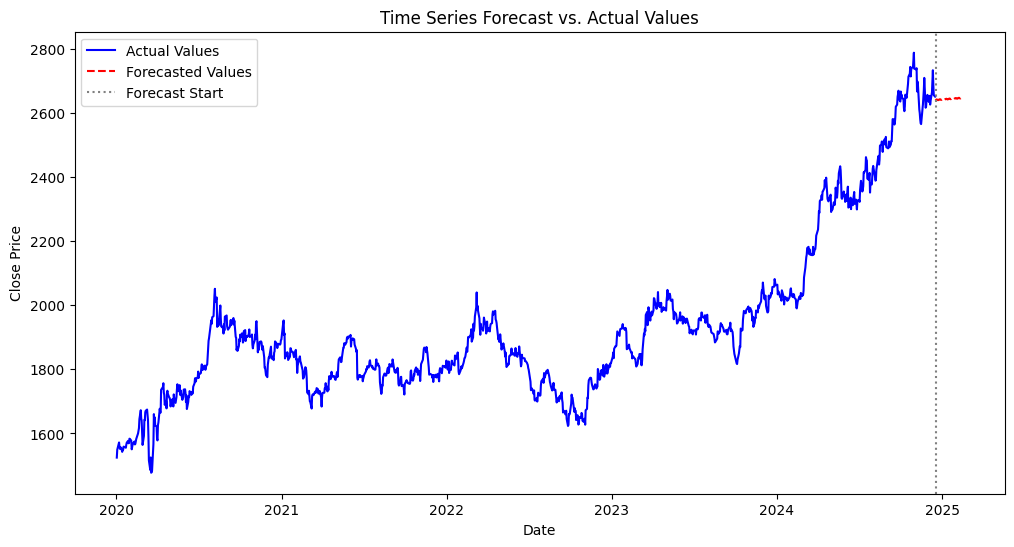

In [10]:
# Convert forecast index to datetime and plot
forecast_autots.index = pd.to_datetime(forecast_autots.index)

plt.figure(figsize=(12, 6))
plt.plot(autots_data['date'], autots_data['value'], label='Actual Values', color='blue')
plt.plot(forecast_autots.index, forecast_autots.values, label='Forecasted Values', color='red', linestyle='dashed')
plt.axvline(x=forecast_autots.index[0], color='gray', linestyle='dotted', label='Forecast Start')
plt.title('Time Series Forecast vs. Actual Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


**Evaluate AutoTS Model**

In [11]:
# Ensure y_test matches y_pred length
y_pred = forecast_autots.values.flatten()
y_test = autots_data['value'].iloc[-len(y_pred):].values.flatten()

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Save AutoTS metrics
autots_metrics = {"R²": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}
print(autots_metrics)


{'R²': -0.2178576954598339, 'MAE': 41.37532220523132, 'MSE': 3017.147893755015, 'RMSE': 54.92857083299196}


# **Comparing Both Models**

In [12]:
print("Comparison of Model Performance:")
print("\nProphet Model Metrics:")
for metric, value in prophet_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nAutoTS Model Metrics:")
for metric, value in autots_metrics.items():
    print(f"{metric}: {value:.4f}")



Comparison of Model Performance:

Prophet Model Metrics:
R²: 0.9731
MAE: 33.5330
MSE: 1825.7718
RMSE: 42.7291

AutoTS Model Metrics:
R²: -0.2179
MAE: 41.3753
MSE: 3017.1479
RMSE: 54.9286


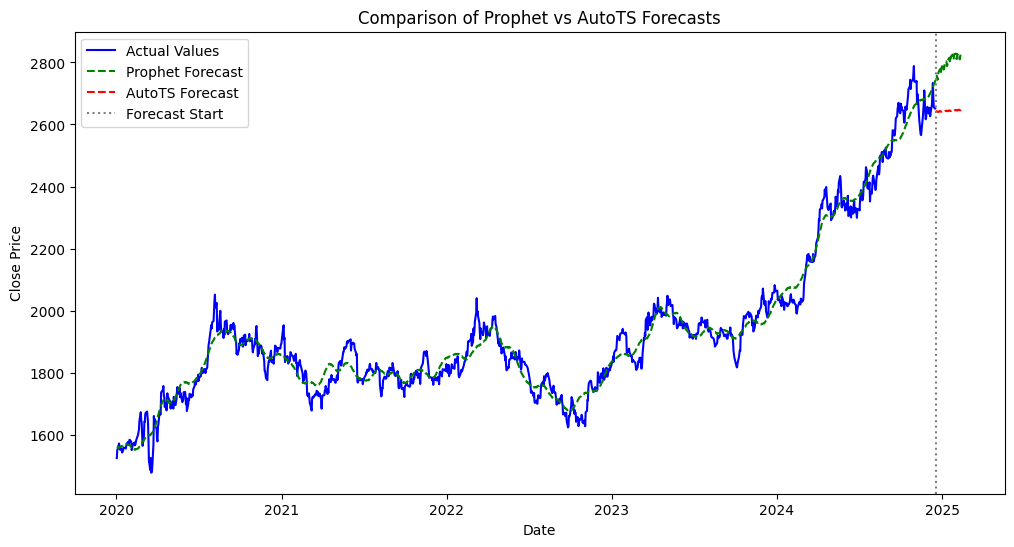

In [13]:
plt.figure(figsize=(12, 6))
# Plot actual values
plt.plot(autots_data['date'], autots_data['value'], label='Actual Values', color='blue')
# Plot Prophet forecasts
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast', color='green', linestyle='dashed')
# Plot AutoTS forecasts
plt.plot(forecast_autots.index, forecast_autots.values, label='AutoTS Forecast', color='red', linestyle='dashed')
# Mark forecast start
plt.axvline(x=forecast_autots.index[0], color='gray', linestyle='dotted', label='Forecast Start')
# Add titles and labels
plt.title('Comparison of Prophet vs AutoTS Forecasts')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
